## Polytope Extremes-DT example notebook

This notebook shows how to use earthkit-data and earthkit-maps to pull destination-earth data from LUMI and plot it using earthkit-maps.

Before running the notebook get an api-key from https://api.ecmwf.int/v1/key/, you can sign up for an account at https://www.ecmwf.int/. Put the user email and user-key in ~/.polytopeapirc (as JSON).

In [1]:
{
    "user_email": "<user_email>",
    "user_key": "<user_key",
}

{'user_email': '<user_email>', 'user_key': '<user_key'}

You can also set POLYTOPE_USER_EMAIL and POLYTOPE_USER_KEY in your environment

# Requirements
To run this notebook install the following:
pip install earthkit-data
pip install earthkit-maps
pip install earthkit-regrid  (Optional for spectral variables)
pip install cf-units         (Optional for unit conversion in maps)

In [2]:
import earthkit.data
import earthkit.maps
import earthkit.regrid

# This request matches a single parameter of the extremes DT, at 4km resolution
# which began production on 2023-12-11

request = {
        "class": "rd",
        "expver": "i7yv",
        "stream": "oper",
        "date": "20231211",
        "time": "0000",
        "type": "fc",
        "levtype": "sfc",
        "step": "0",
        "param": "167"
    }

#data is an earthkit streaming object but with stream=False will download data immediately 
data = earthkit.data.from_source("polytope", "destination-earth", request, address="polytope.apps.lumi.ewctest.link", stream=False)


2024-01-29 13:41:37 - INFO - Sending request...
{'request': 'class: rd\n'
            "date: '20231211'\n"
            'expver: i7yv\n'
            'levtype: sfc\n'
            "param: '167'\n"
            "step: '0'\n"
            'stream: oper\n'
            "time: '0000'\n"
            'type: fc\n',
 'verb': 'retrieve'}
2024-01-29 13:41:38 - INFO - Request accepted. Please poll http://polytope.apps.lumi.ewctest.link/api/v1/requests/4eed909d-8eee-4a49-8df2-22e6b84040fd for status
2024-01-29 13:41:38 - INFO - Checking request status (4eed909d-8eee-4a49-8df2-22e6b84040fd)...
2024-01-29 13:41:38 - INFO - The current status of the request is 'queued'
2024-01-29 13:41:39 - INFO - The current status of the request is 'processing'
2024-01-29 13:41:41 - INFO - The current status of the request is 'processed'


In [3]:
style = earthkit.maps.Style(
    levels=range(-40, 31, 5),
    units='celsius',
    extend='both',
)

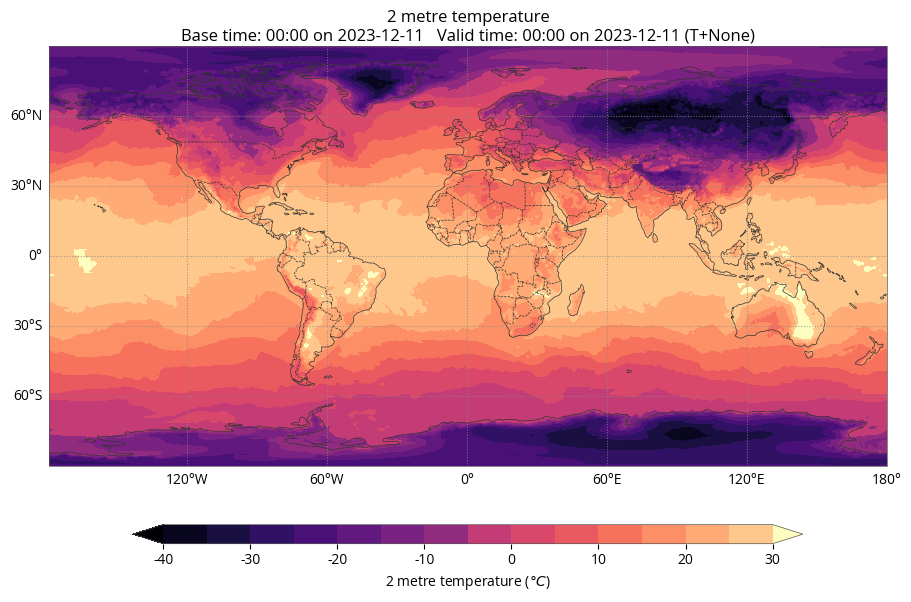

In [4]:
earthkit.maps.quickplot(data, style=style)